## Business Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

### About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

### Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
### Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import *
warnings.filterwarnings('ignore')

In [2]:
# Setting style parameters for graphs
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
#plt.rcParams['figure.facecolor']='#FFE5B4'

## Data Exploration

In [66]:
data=pd.read_csv("term_deposit_train.csv")
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [67]:
# Checking the dimension of the train dataset
data.shape

(31647, 18)

In [68]:
data_test=pd.read_csv("term_deposit_test.csv")
data_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


The train dataset contains 31647 observations and 18 features, out of which one ("subscribed") is target variable.

In [69]:
# Checking the dimension of the train dataset
data_test.shape

(13564, 17)

The train dataset contains 13564 observations and 17 features, out of which one ("subscribed") is target variable.

In [70]:
# Replace abbreviated month with full name

# data['month']=pd.to_datetime(data['month'],format='%b').dt.month_name()

In [71]:
# Add new column at specific position
# data.insert(12,"date","")

In [72]:
# Drop unwanted columns

data.drop('ID',axis=1,inplace=True)
data_test.drop('ID',axis=1,inplace=True)

In [10]:
# Getting an overview of the dataset by checking it's information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


There are no missing values, and the dataset is consists of categorical and numerical data.

In [73]:
# Getting an overview of the test dataset by checking it's information
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


There are no missing values, and the dataset is consists of categorical and numerical data.

In [17]:
# Checking missing values

data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

I've confirmed that there are no missing values in the train dataset.

In [74]:
# Checking missing values in the test dataset

data_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

I've confirmed that there are no missing values in the test dataset.

In [18]:
# Checking number of unique values in each column
# If there is a feature with just one value, it can be dropped.
data.nunique().to_frame("Unique values per feature")

,Unique values per feature
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [19]:
# Data description - to get an overview of numerical data

round(data.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,31647.00,31647.00,31647.00,31647.00,31647.00,31647.00,31647.00
mean,40.96,1363.89,15.84,258.11,2.77,39.58,0.57
std,10.63,3028.30,8.34,257.12,3.11,99.32,2.42
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,73.00,8.00,104.00,1.00,-1.00,0.00
50%,39.00,450.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1431.00,21.00,318.50,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


There are outliers in the dataset, and most of the data seems to be right-skewed. Furthermore, high std values show that the data points are spread out further from the mean.

In [75]:
# Checking the unique values per feature in the train dataset

for i in data.select_dtypes(include='object').columns:
    print(data[i].unique())
    #print("\n")

['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
['married' 'divorced' 'single']
['unknown' 'secondary' 'tertiary' 'primary']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular' 'unknown']
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
['unknown' 'success' 'failure' 'other']
['no' 'yes']


In [77]:
# Checking the unique values per feature in the test dataset

for i in data_test.select_dtypes(include='object').columns:
    print(data_test[i].unique())
    #print("\n")

['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown']
['married' 'divorced' 'single']
['secondary' 'primary' 'tertiary' 'unknown']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['cellular' 'telephone' 'unknown']
['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct']
['unknown' 'failure' 'other' 'success']


In [78]:
# Checking value counts per categorical feature 
for i in data.select_dtypes(include='object').columns:
    print(data[i].value_counts())
    print("\n")

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


yes    17584
no     14063
Name: housing, dtype: int64


no     26516
yes     5131
Name: loan, dtype: int64


cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int

In [79]:
# Checking duplicates in the train dataset.

print("Total Duplicate Rows are:",data.duplicated().sum())

Total Duplicate Rows are: 0


There are no duplicates in the train dataset.

In [80]:
# Checking duplicates in the test dataset.

print("Total Duplicate Rows are:",data_test.duplicated().sum())

Total Duplicate Rows are: 0


There are no duplicates in the test dataset.

In [23]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [81]:
data_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [24]:
#data.head()

### Separating Numerical and Categorical columns

In [82]:
# Separating Categorical columns in the train dataset.

categoricalFeatures=[x for x in data.columns if ((data[x].dtypes=='object') & (x not in ['subscribed']))]

# Separating Categorical columns in the test dataset.

categoricalFeatures_test=[x for x in data_test.columns if ((data_test[x].dtypes=='object') & (x not in ['subscribed']))]

In [26]:
print(categoricalFeatures)
print("There are",len(categoricalFeatures),"categorical features in the train dataset.")

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
There are 9 categorical features.


In [83]:
print(categoricalFeatures_test)
print("There are",len(categoricalFeatures_test),"categorical features in the test dataset.")

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
There are 9 categorical features in the test dataset.


In [27]:
# Separating Numerical columns in the train dataset
numericalFeatures=[x for x in data.columns if ((data[x].dtypes !='object') & (x not in ['subscribed']))]

# Checking the numerical columns
data[numericalFeatures].head()

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


In [28]:
print(numericalFeatures)
print("There are",len(numericalFeatures),"numerical features.")

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
There are 7 numerical features.


In [84]:
# Separating Numerical columns in the test dataset
numericalFeatures_test=[x for x in data_test.columns if ((data_test[x].dtypes !='object') & (x not in ['subscribed']))]

# Checking the numerical columns
data_test[numericalFeatures_test].head()

,age,balance,day,duration,campaign,pdays,previous
0,32,118,15,20,6,-1,0
1,78,2787,1,372,1,-1,0
2,31,144,16,676,1,-1,0
3,57,3777,13,65,2,-1,0
4,45,-705,3,111,1,-1,0


In [85]:
print(numericalFeatures_test)
print("There are",len(numericalFeatures_test),"numerical features in the test dataset.")

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
There are 7 numerical features in the test dataset.


## Data Visualization

### Categorical feature distribution

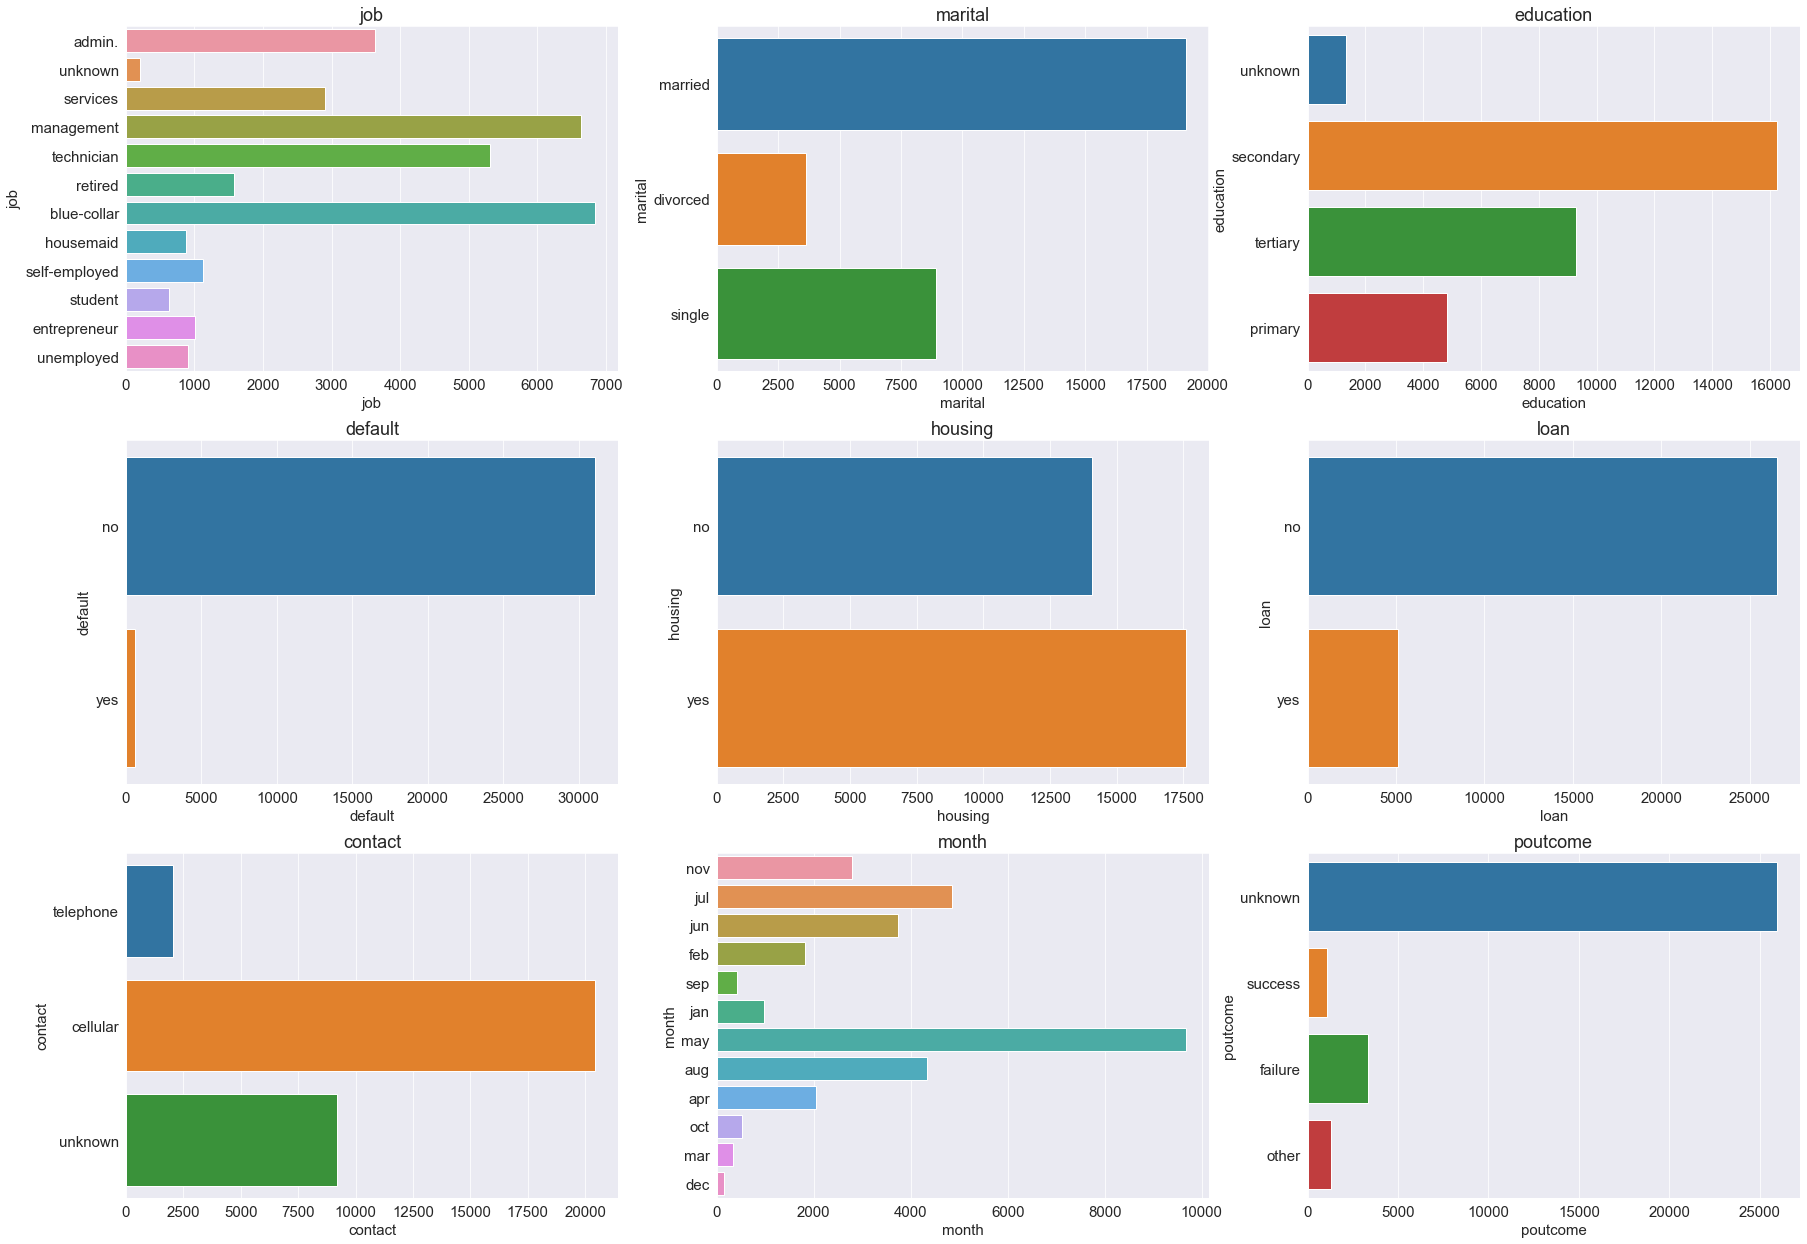

In [29]:
# Categorical feature distribution
# Checking count

plt.figure(figsize=(30,90),facecolor="white")
plotnumber=1

for i in categoricalFeatures:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=i, data=data)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

### Categorical features Vs. Target Variable

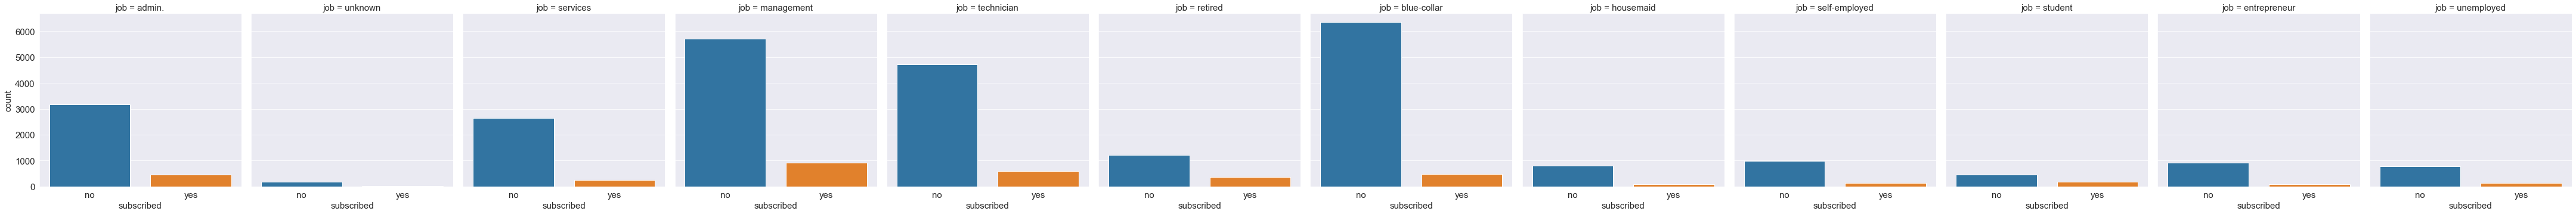

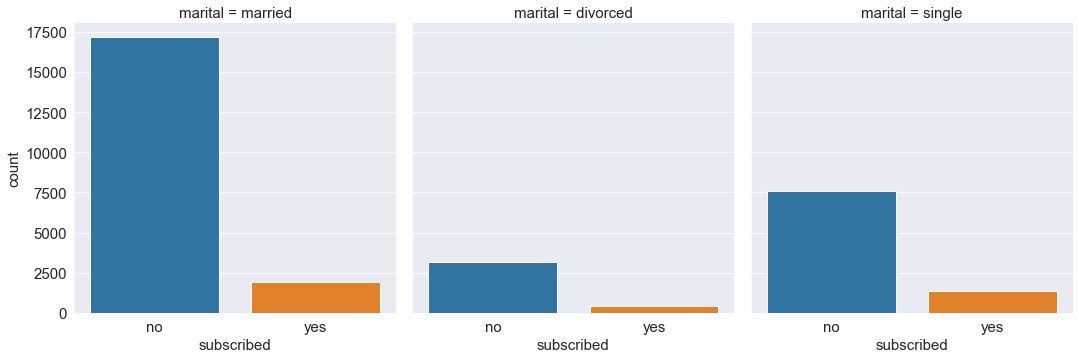

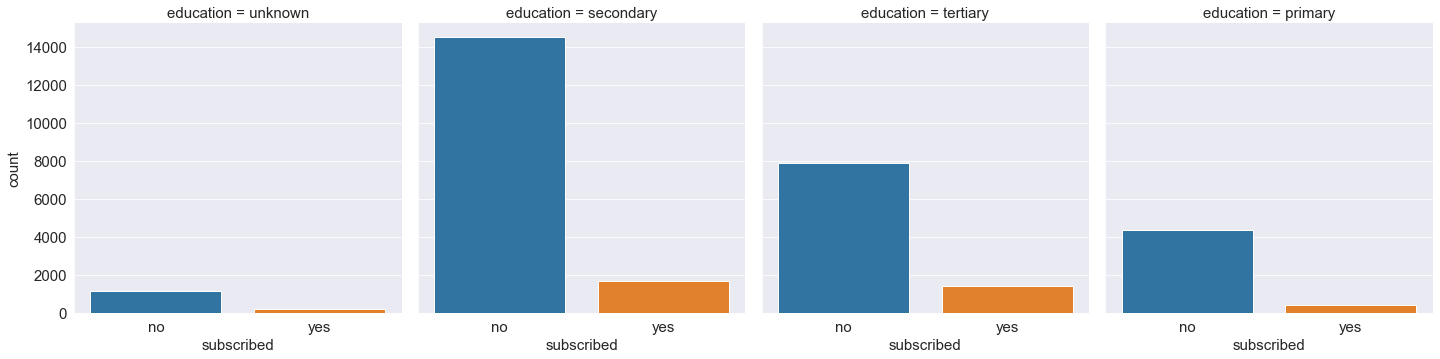

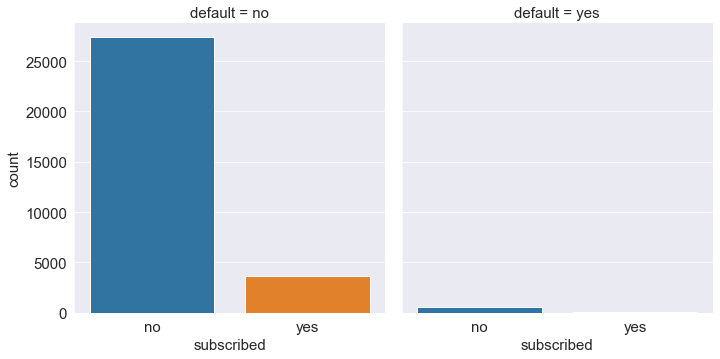

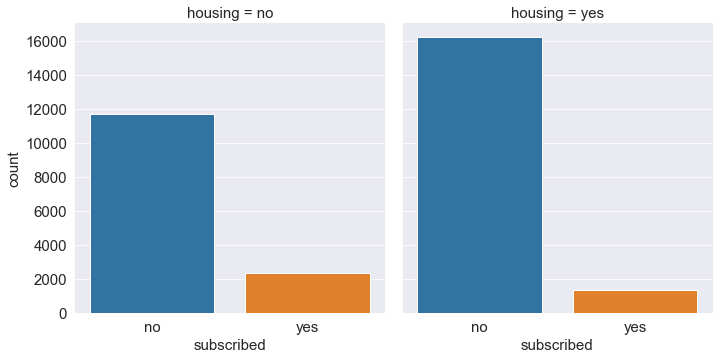

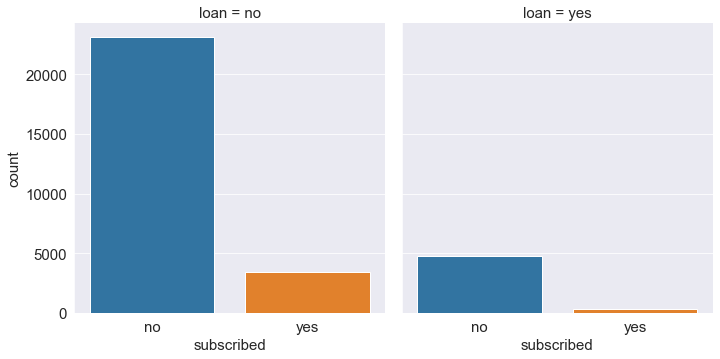

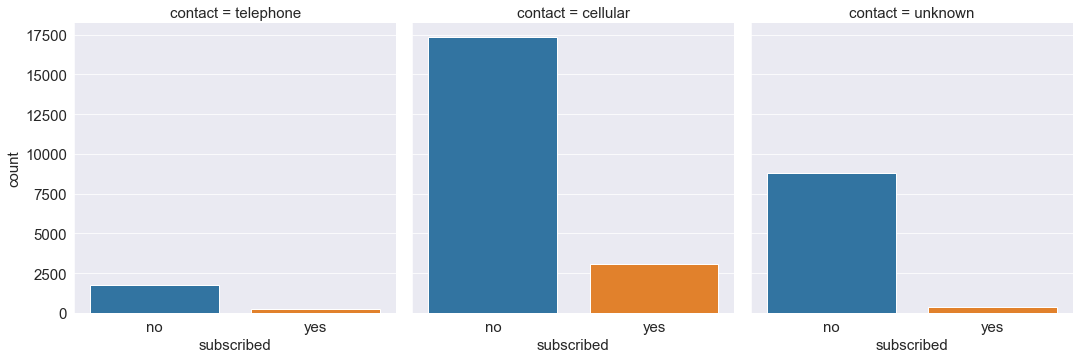

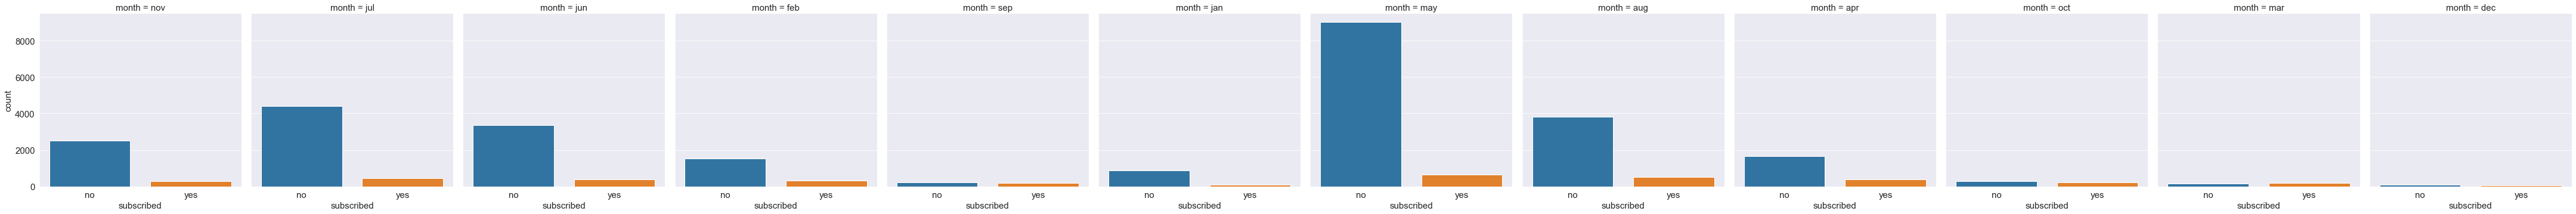

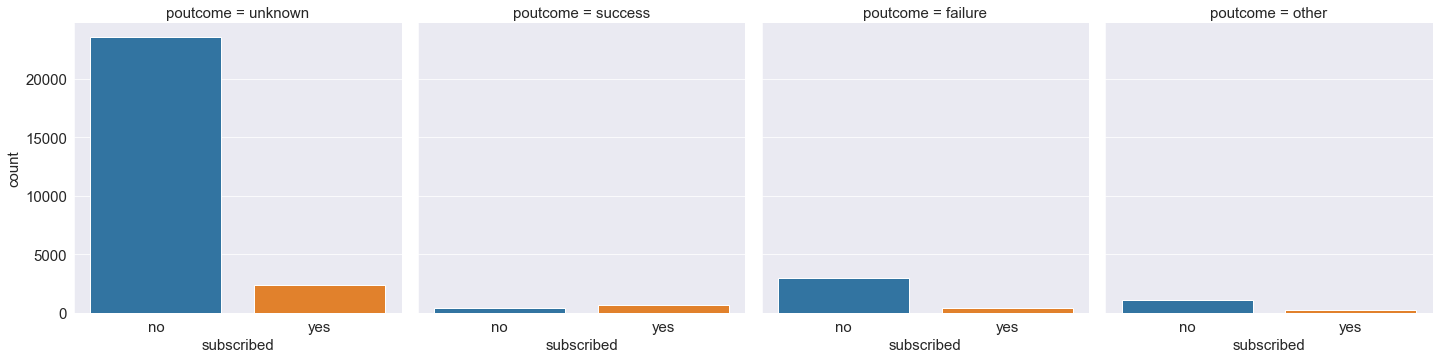

In [30]:
# Relation between categorical features and the label

for i in categoricalFeatures:
    sns.catplot(x='subscribed',col=i,kind='count',data=data)
plt.show()

In [31]:
# Display the data shown by the graphs
# Checking the count of features vs. target label

for i in categoricalFeatures:
    print(data.groupby(['subscribed',i]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

Insights:

Most of the clients in all categories have not been subscribed to a term deposit.

### Numerical feature distribution

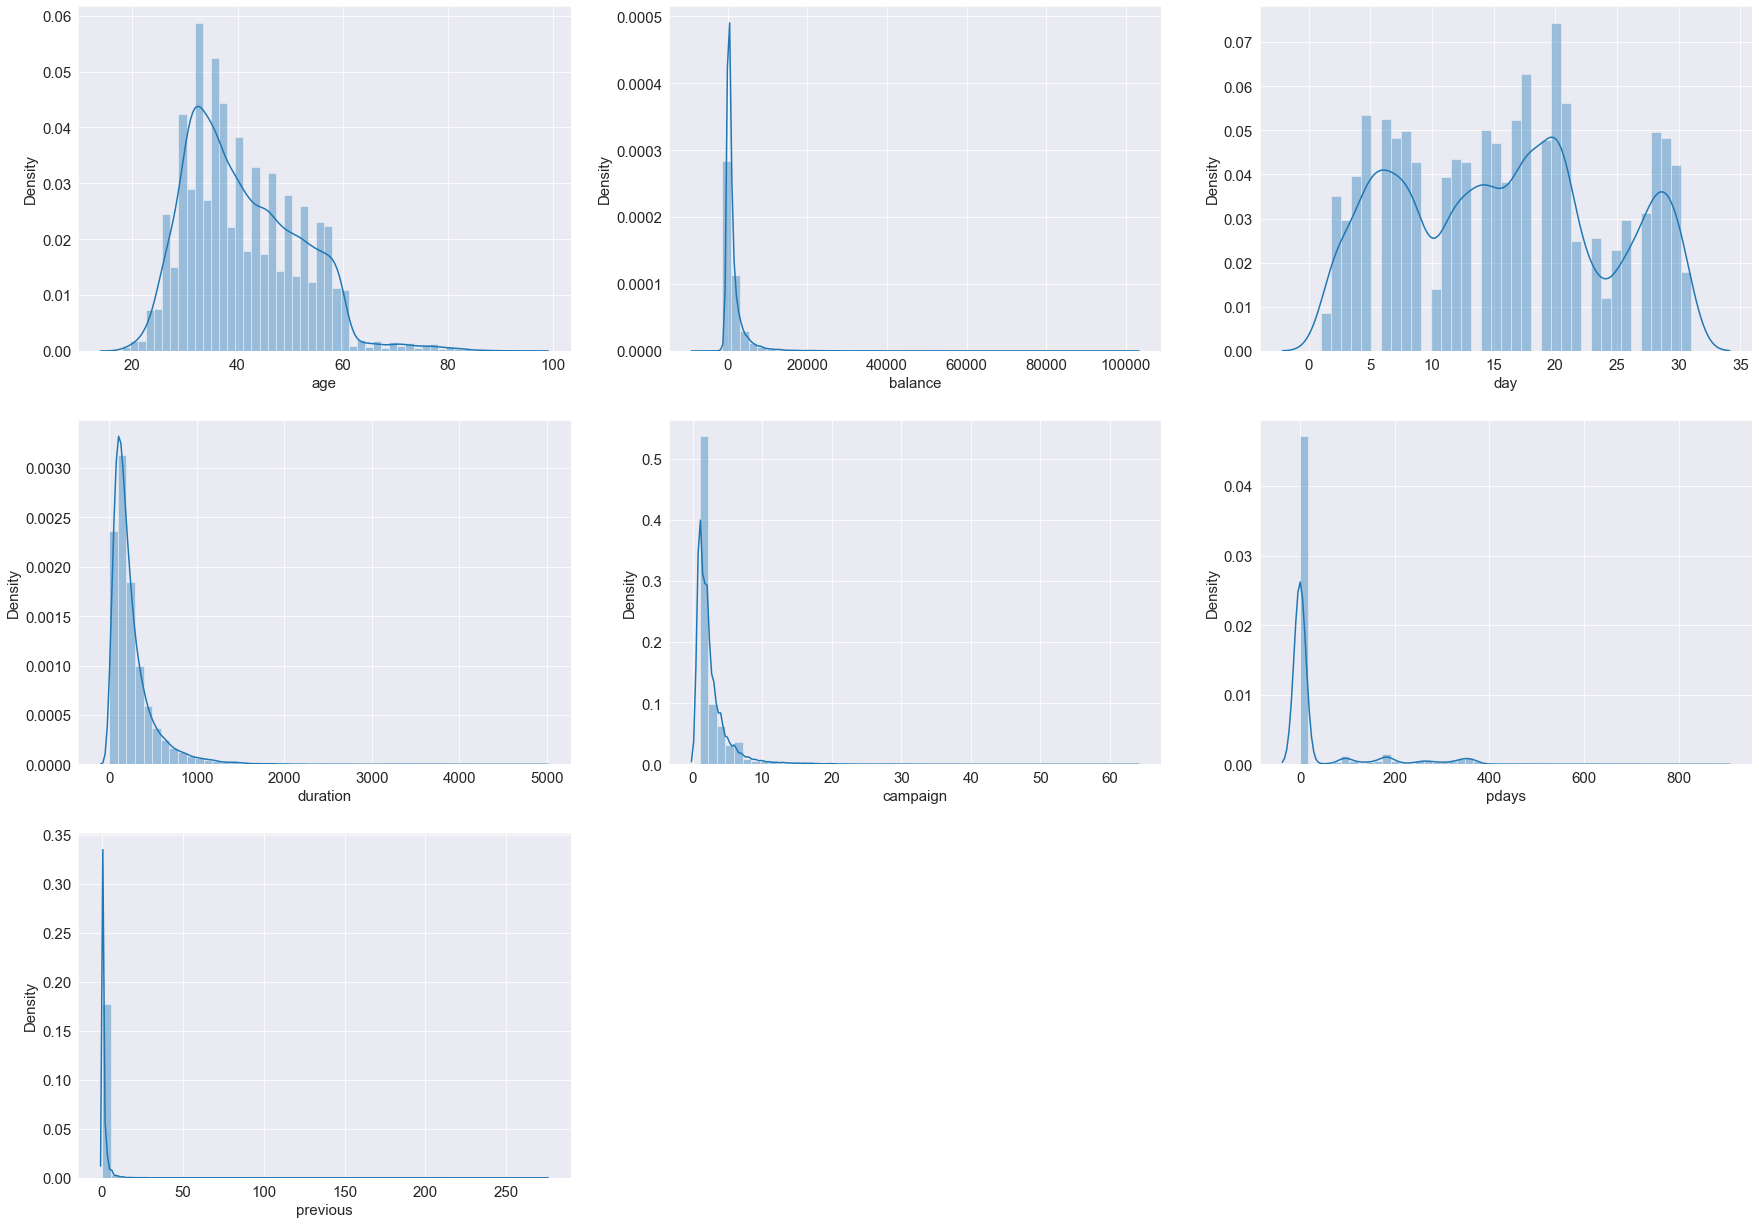

In [32]:
# Exploring the numerical features
# Plot univariate distribution of continuous data

plt.figure(figsize=(30,90),facecolor="white")
plotnumber=1

for i in numericalFeatures:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

There is evidence of outliers in the dataset. Most of the numerical features seem to be right-skewed, except for age and days, which look more normally distributed.

### Numerical features Vs. Target Variable

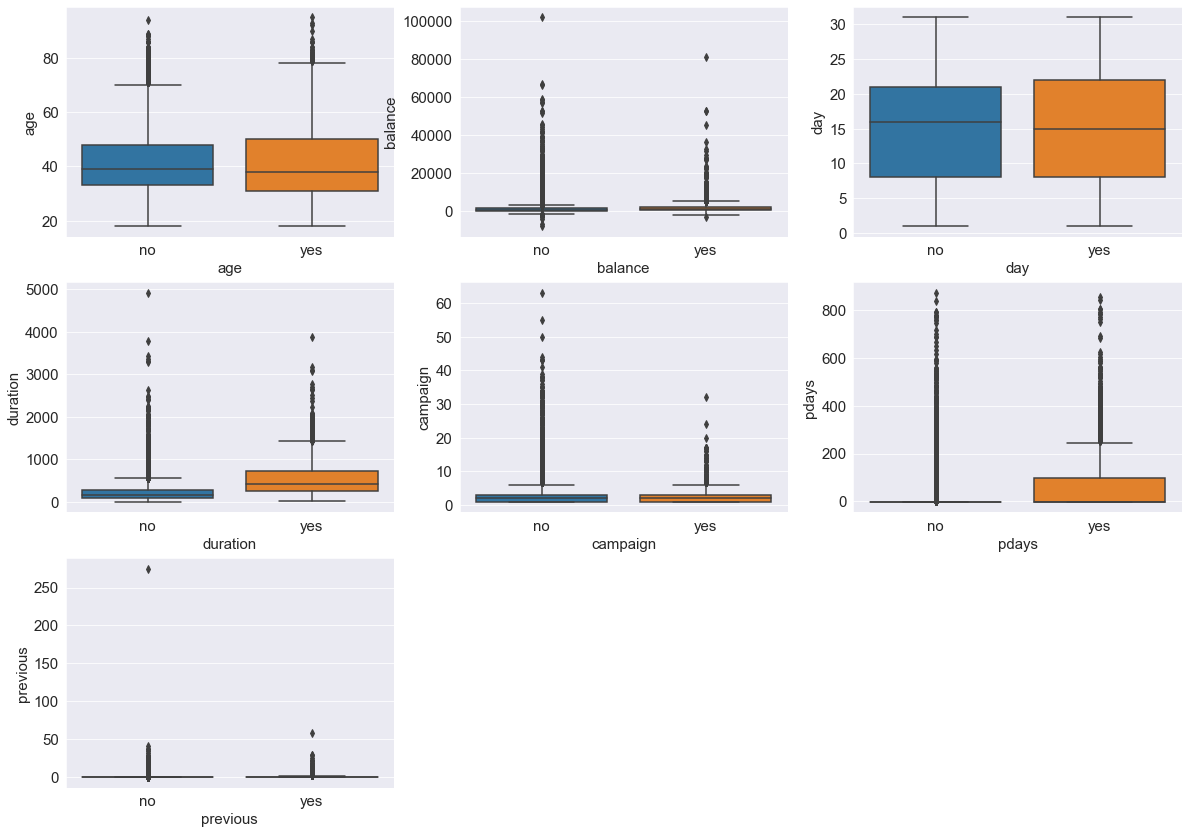

In [33]:
# Relation between numerical features and the label
# Boxplot to show target distribution with respect to numerical features

plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1

for i in numericalFeatures:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='subscribed',y=data[i],data=data)
    plt.xlabel(i)
    plotnumber+=1
plt.show()

## Outliers in numerical features

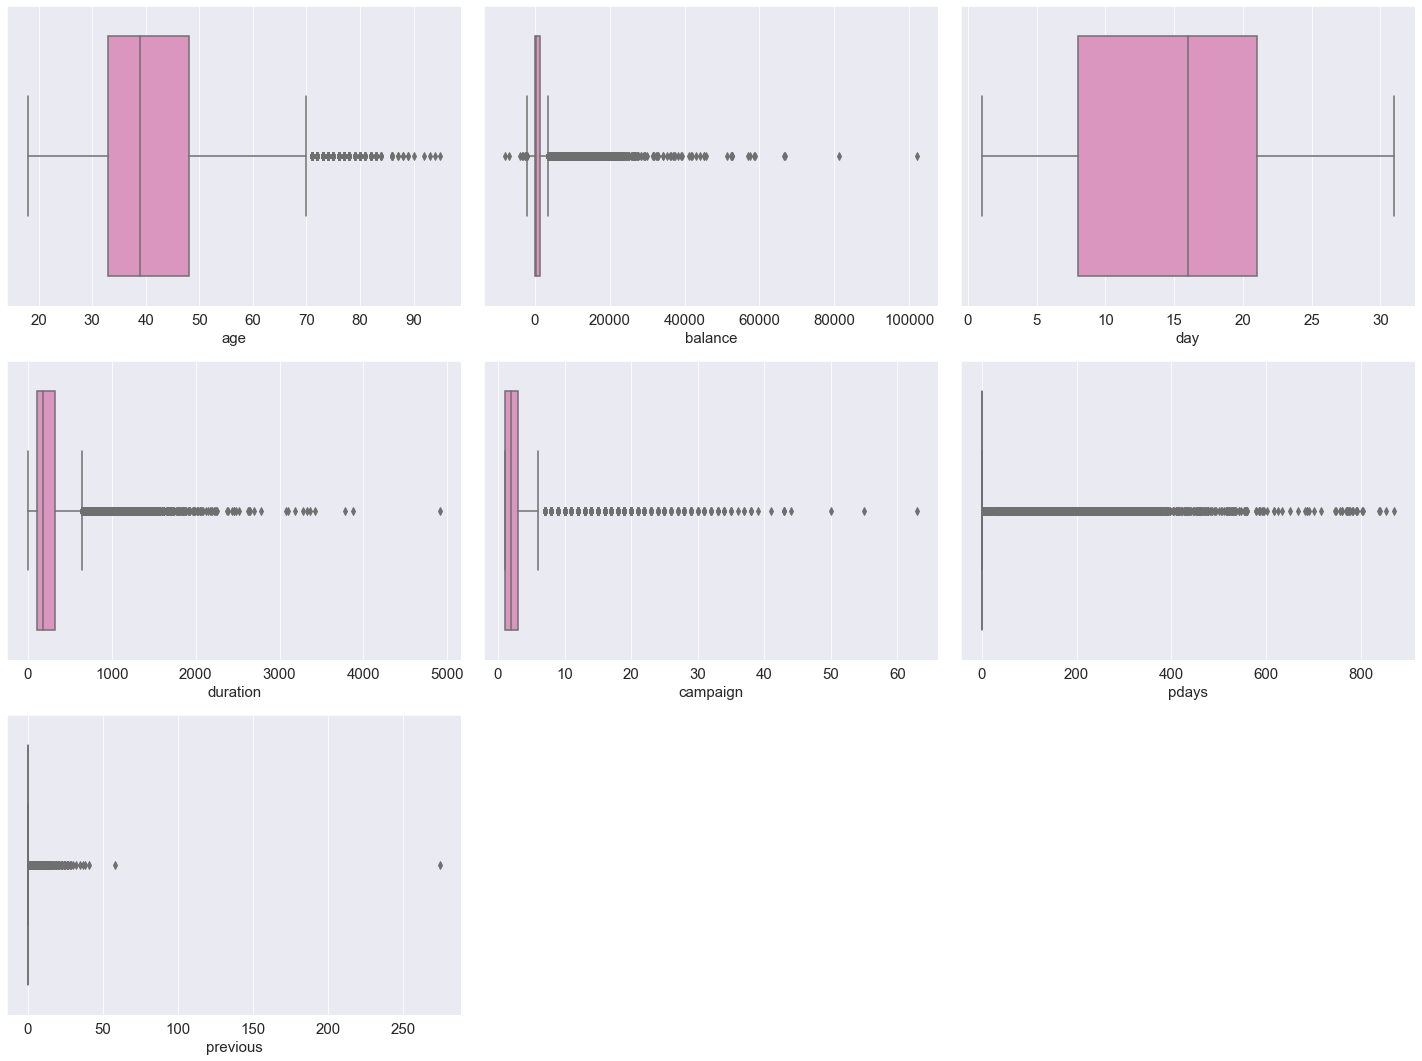

In [34]:
# Let's check the outliers by plotting boxplot.

plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for col in numericalFeatures:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights:
The all numerical fetures except for 'days' have outliers.

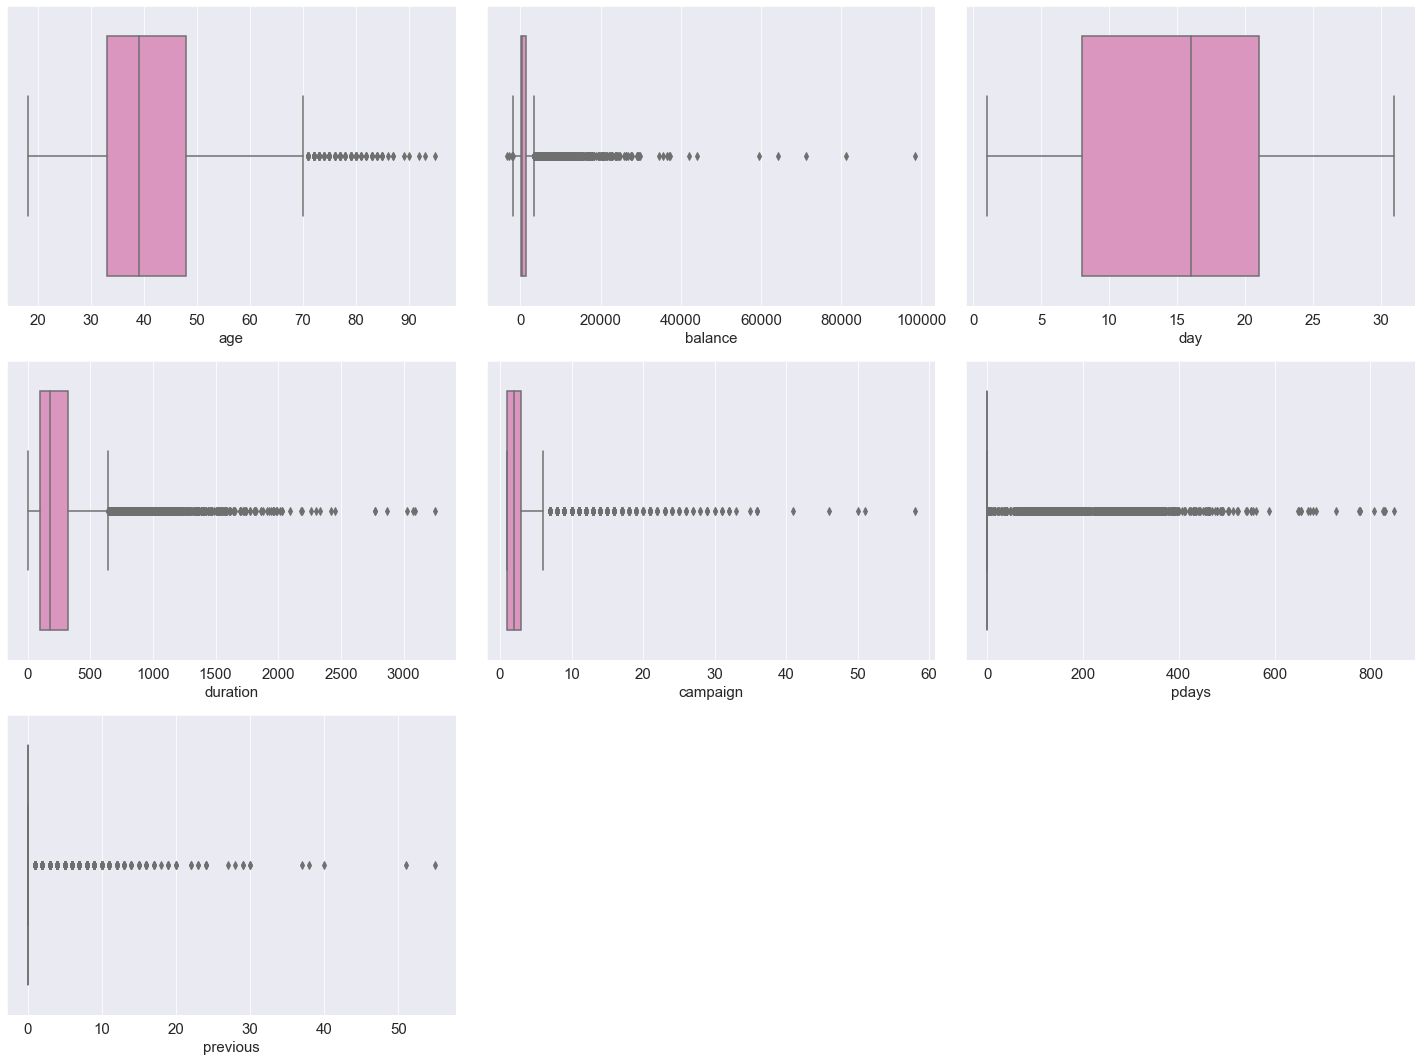

In [86]:
### Outliers in test dataset
# Let's check the outliers by plotting boxplot.

plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for col in numericalFeatures_test:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data_test[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Correlation

In [35]:
## Explore the correlation between numerical features in train dataset
cor=data.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


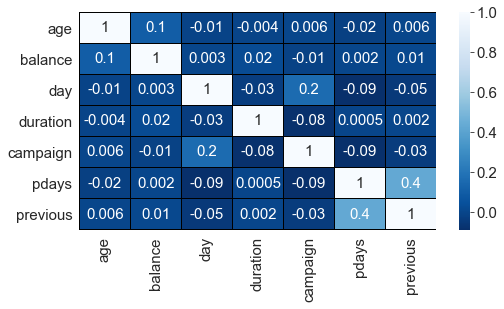

In [36]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

No numerical feature seems to be highly correlated with other numerical features in the train dataset.

In [37]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [87]:
## Explore the correlation between numerical features in test dataset
cor=data.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


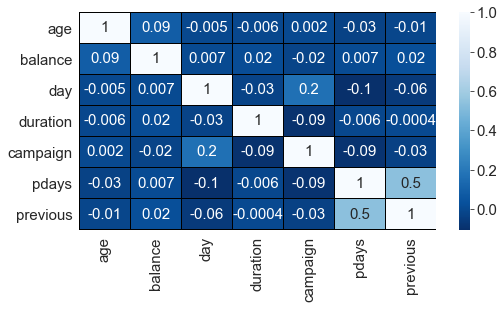

In [88]:
# Visualizing the correlation matrix in test dataset by plotting heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data_test.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

No numerical feature seems to be highly correlated with other numerical features in the test dataset.

## Feature Engineering

### Drop unwanted features

In [38]:
# How important is the default feature in the train dataset?

data.groupby(['subscribed','default']).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

More than 90% of the default feature are No. Therefore, I can remove it, since it will not have an important impact on the model.

In [90]:
# How important is the default feature in the test dataset?

data_test.groupby(['default']).size()

default
no     13334
yes      230
dtype: int64

In [91]:
data.drop('default',axis=1,inplace=True)
data_test.drop('default',axis=1,inplace=True)

In [40]:
# How important is the pdays feature in the train dataset?
data.groupby(['subscribed','pdays']).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

More than 70% of the data has -1 as pdays value, which does not have a significant meaning. So I can drop it.

In [93]:
# How important is the pdays feature in the test dataset?
data_test.groupby(['pdays']).size()

pdays
-1      11030
 1          4
 2         12
 3          1
 5          4
 6          3
 7          1
 8          9
 9          4
 13         1
 14         4
 15         1
 17         2
 20         1
 22         2
 24         1
 28         3
 29         1
 31         1
 34         1
 35         1
 37         3
 38         2
 39         1
 40         3
 41         1
 42         1
 48         2
 50         1
 53         1
 55         3
 57         3
 59         1
 60         2
 61         1
 62         2
 63         3
 65         1
 66         2
 67         2
 68         1
 69         2
 70         1
 71         3
 73         2
 74         3
 75         1
 76         2
 77         3
 78         2
 79         4
 80         3
 81         2
 82         1
 83         6
 84         8
 85        14
 86         5
 87        16
 88         8
 89         6
 90        20
 91        39
 92        47
 93        21
 94        22
 95        20
 96        16
 97        18
 98        10
 99         7


In [94]:
# Dropping 'pdays' feature

data.drop('pdays',axis=1,inplace=True)
data_test.drop('pdays',axis=1,inplace=True)

## Outliers

In [42]:
# Removing the outliers - Age Feature in the train dataset

data.groupby('age',sort=True)['age'].count()

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

The age range lies between 18 to 95 years old. I will not remove values from here.

In [95]:
# Removing the outliers - Age Feature in the test dataset

data_test.groupby('age',sort=True)['age'].count()

age
18      4
19     13
20     11
21     31
22     43
23     60
24     90
25    161
26    241
27    282
28    309
29    333
30    538
31    579
32    628
33    566
34    609
35    580
36    561
37    515
38    481
39    408
40    395
41    382
42    369
43    340
44    350
45    372
46    368
47    339
48    300
49    294
50    280
51    283
52    244
53    291
54    214
55    224
56    235
57    252
58    230
59    220
60    176
61     38
62     34
63     28
64     27
65     22
66     17
67     14
68     10
69     12
70     23
71     11
72     17
73     14
74      8
75     14
76      7
77     11
78      6
79     10
80      9
81      4
82      4
83      6
84      4
85      5
86      1
87      2
89      1
90      1
92      1
93      1
95      1
Name: age, dtype: int64

In [43]:
# Removing the outliers - Balance Feature in the train dataset

data.groupby(['subscribed','balance'],sort=True)['balance'].count()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

I will not remove outliers from 'balance' feature, because as values go high, it shows clients who are subscribed.

In [97]:
# Removing the outliers - Balance Feature in the test dataset

data_test.groupby(['balance'],sort=True)['balance'].count()

balance
-3313        1
-2827        1
-2093        1
-2049        1
-1965        1
-1882        1
-1818        1
-1781        1
-1746        1
-1737        1
-1730        1
-1701        1
-1661        1
-1655        1
-1621        1
-1598        1
-1545        1
-1490        1
-1459        1
-1415        1
-1386        1
-1317        1
-1270        1
-1224        1
-1196        1
-1193        1
-1185        1
-1176        1
-1164        1
-1161        1
-1157        1
-1136        1
-1092        1
-1091        1
-1053        1
-1050        1
-1042        1
-1041        1
-1038        1
-1007        1
-1001        1
-998         1
-994         1
-978         1
-970         1
-954         1
-948         1
-947         1
-933         1
-910         1
-901         1
-898         3
-892         3
-888         1
-886         2
-880         1
-872         1
-871         1
-870         1
-868         1
-864         1
-848         1
-847         2
-846         1
-835         1
-834         1
-8

In [44]:
# Removing the outliers - Duration Feature

data.groupby(['subscribed','duration'],sort=True)['duration'].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

I will not remove outliers from 'duration' feature, because as values go high, it shows clients who are subscribed.

In [45]:
# Removing the outliers - Campaign Feature

pd.set_option('display.max_rows', None)
grouped_df = data.groupby(['subscribed','campaign'],sort=True)['campaign'].count()
grouped_df

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
            6             845
            7             484
            8             335
            9             221
            10            173
            11            115
            12            100
            13             88
            14             65
            15             58
            16             52
            17             46
            18             37
            19             30
            20             36
            21             19
            22             18
            23             13
            24             12
            25             17
            26              9
            27              8
            28             14
            29             12
            30              6
            31              9
            32              5
            33     

It looks like after values greater than 32 can be considered as outliers. So I will remove these values.

In [98]:
# Creating a new dataframe that excludes values greater than 32 in the campaign feature in train dataset

data_2=data[data['campaign']<33]
data_2_test=data_test[data_test['campaign']<33]

In [47]:
# Checking that these values have been removed in train dataset
data_2.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
            6             845
            7             484
            8             335
            9             221
            10            173
            11            115
            12            100
            13             88
            14             65
            15             58
            16             52
            17             46
            18             37
            19             30
            20             36
            21             19
            22             18
            23             13
            24             12
            25             17
            26              9
            27              8
            28             14
            29             12
            30              6
            31              9
            32              5
yes         1      

In [99]:
# Checking that these values have been removed in test dataset
data_2_test.groupby(['campaign'],sort=True)['campaign'].count()

campaign
1     5282
2     3707
3     1663
4     1080
5      519
6      375
7      217
8      184
9       91
10      82
11      75
12      53
13      40
14      25
15      23
16      25
17      17
18      14
19      14
20       6
21      16
22       5
23       9
24       7
25       5
26       4
27       2
28       2
29       4
30       2
31       3
32       3
Name: campaign, dtype: int64

In [48]:
# Removing the outliers - previous Feature in train dataset
data_2.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [100]:
# Removing the outliers - previous Feature in test dataset
data_2_test.groupby(['previous'],sort=True)['previous'].count()

previous
0     11020
1       851
2       625
3       362
4       213
5       148
6        89
7        67
8        48
9        28
10       18
11       19
12       14
13        8
14        5
15        5
16        5
17        4
18        1
19        3
20        3
22        2
23        2
24        3
27        1
28        1
29        2
30        2
37        1
38        1
40        1
51        1
55        1
Name: previous, dtype: int64

It looks like after values greater than 31 can be considered as outliers. So I will remove these values.

In [112]:
# Creating a new dataframe that excludes values greater than 31 in the 'previous' feature in train dataset

data_3=data_2[data_2['previous']<31]

# Checking that these values have been removed in train dataset
data_3.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
yes         0            2371
            1             422
            2      

In [119]:
# Creating a new dataframe that excludes values greater than 31 in the 'previous' feature in test dataset

data_3_test=data_2_test[data_2_test['previous']<31]

# Checking that these values have been removed in test dataset
data_3.groupby(['previous'],sort=True)['previous'].count()

previous
0     25896
1      1921
2      1481
3       780
4       501
5       311
6       188
7       138
8        81
9        64
10       49
11       46
12       30
13       30
14       14
15       15
16        8
17       11
18        5
19        8
20        5
21        4
22        4
23        6
24        2
25        4
26        2
27        4
28        1
29        2
30        1
Name: previous, dtype: int64

## Encode Categorical Features

In [107]:
print(categoricalFeatures)
print(categoricalFeatures_test)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [113]:

# Distinguish between boolean and non-boolean

# Train dataset

categoricalColumns=['job','marital','education','contact','month','poutcome']

for col in categoricalColumns:
    data_3=pd.concat([data_3.drop(col,axis=1),pd.get_dummies(data_3[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)
    

In [123]:
# Test dataset

categoricalColumns_test=['job','marital','education','contact','month','poutcome']

for col in categoricalColumns_test:
    data_3_test=pd.concat([data_3_test.drop(col,axis=1),pd.get_dummies(data_3_test[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)
    

In [115]:
# Train dataset

booleanColumns=['housing','loan','subscribed']

for col in booleanColumns:
    data_3[col+'_new']=data_3[col].apply(lambda x: 1 if x=='yes' else 0)
    data_3.drop(col,axis=1,inplace=True)

In [120]:
# Test dataset

booleanColumns_test=['housing','loan']

for col in booleanColumns_test:
    data_3_test[col+'_new']=data_3_test[col].apply(lambda x: 1 if x=='yes' else 0)
    data_3_test.drop(col,axis=1,inplace=True)

In [121]:
data_3.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,subscribed_new
0,56,1933,19,44,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,31,3,20,91,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,27,891,18,240,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,57,3287,22,867,1,3,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,31,119,4,380,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [124]:
data_3_test.head()

,age,balance,day,duration,campaign,previous,housing_new,loan_new,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,1,372,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,13,65,2,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,3,111,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


## Checking if the dataset is balanced based on target values.

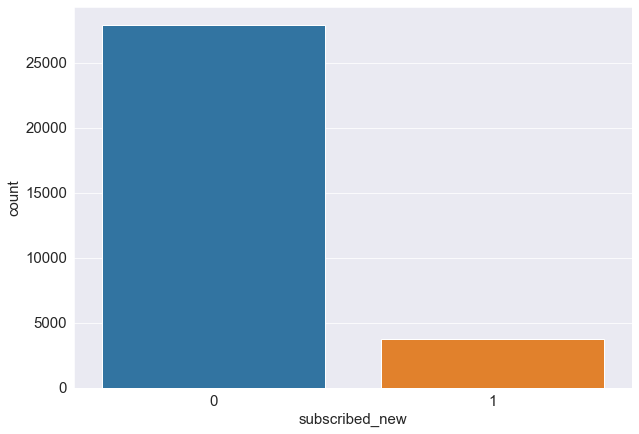

In [57]:
# Train data
sns.countplot(x='subscribed_new',data=data_3)
plt.show()

The dataset is not balanced. Since it is a classification problem, I will balance the data using the oversampling method.

### Oversampling

In [125]:
# Separating features and label

x=data_3.drop("subscribed_new",axis=1)
y=data_3["subscribed_new"]

In [126]:
y.value_counts()

0    27898
1     3714
Name: subscribed_new, dtype: int64

In [127]:
# Oversampling the data

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [128]:
y1.value_counts()

0    27898
1    27898
Name: subscribed_new, dtype: int64

## Modelling

In [129]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_val,y_train,y_val=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)

Best accuracy is  0.9738506959088992 at random_state 107


In [130]:
# Creating train test split

x_train,x_val,y_train,y_val=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)
x_test=data_3_test

In [131]:
# Shapes of the datasets
x_train.shape, x_val.shape, y_train.shape, y_val.shape, x_test.shape

((39057, 40), (16739, 40), (39057,), (16739,), (13549, 40))

## Model Building

### Classification Algorithms

In [132]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [133]:
# Checking the accuracy for RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_val)
acc_RFC=accuracy_score(y_val,predRFC)
print(acc_RFC)
print(confusion_matrix(y_val,predRFC))
print(classification_report(y_val,predRFC))

0.9456359400203118
[[7928  370]
 [ 540 7901]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8298
           1       0.96      0.94      0.95      8441

    accuracy                           0.95     16739
   macro avg       0.95      0.95      0.95     16739
weighted avg       0.95      0.95      0.95     16739



In [134]:
# Checking the accuracy for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_val)
acc_LR=accuracy_score(y_val,predLR)
print(acc_LR)
print(confusion_matrix(y_val,predLR))
print(classification_report(y_val,predLR))

0.8937809905012247
[[7543  755]
 [1023 7418]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8298
           1       0.91      0.88      0.89      8441

    accuracy                           0.89     16739
   macro avg       0.89      0.89      0.89     16739
weighted avg       0.89      0.89      0.89     16739



In [135]:
# Checking the accuracy for Support Vector Machine Classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_val)
acc_SVC=accuracy_score(y_val,predsvc)
print(acc_SVC)
print(confusion_matrix(y_val,predsvc))
print(classification_report(y_val,predsvc))

0.7241770715096482
[[6689 1609]
 [3008 5433]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      8298
           1       0.77      0.64      0.70      8441

    accuracy                           0.72     16739
   macro avg       0.73      0.72      0.72     16739
weighted avg       0.73      0.72      0.72     16739



In [136]:
# Checking the accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_val)
acc_GB=accuracy_score(y_val,predGB)
print(acc_GB)
print(confusion_matrix(y_val,predGB))
print(classification_report(y_val,predGB))

0.932373499014278
[[7748  550]
 [ 582 7859]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8298
           1       0.93      0.93      0.93      8441

    accuracy                           0.93     16739
   macro avg       0.93      0.93      0.93     16739
weighted avg       0.93      0.93      0.93     16739



In [137]:
# Checking the accuracy for AdaBoost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_val)
acc_ABC=accuracy_score(y_val,predABC)
print(acc_ABC)
print(confusion_matrix(y_val,predABC))
print(classification_report(y_val,predABC))

0.9262799450385327
[[7755  543]
 [ 691 7750]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8298
           1       0.93      0.92      0.93      8441

    accuracy                           0.93     16739
   macro avg       0.93      0.93      0.93     16739
weighted avg       0.93      0.93      0.93     16739



In [138]:
# Checking the accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_val)
acc_BC=accuracy_score(y_val,predBC)
print(acc_BC)
print(confusion_matrix(y_val,predBC))
print(classification_report(y_val,predBC))

0.9370332755839655
[[7854  444]
 [ 610 7831]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8298
           1       0.95      0.93      0.94      8441

    accuracy                           0.94     16739
   macro avg       0.94      0.94      0.94     16739
weighted avg       0.94      0.94      0.94     16739



In [139]:
# Checking the accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_val)
acc_ET=accuracy_score(y_val,predET)
print(acc_ET)
print(confusion_matrix(y_val,predET))
print(classification_report(y_val,predET))

0.9396618674950714
[[7965  333]
 [ 677 7764]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8298
           1       0.96      0.92      0.94      8441

    accuracy                           0.94     16739
   macro avg       0.94      0.94      0.94     16739
weighted avg       0.94      0.94      0.94     16739



In [140]:
# Checking all algorithm results

results_alg=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Accuracy':[acc_RFC,acc_LR,acc_SVC,acc_GB,acc_ABC,acc_BC,acc_ET]})
results_alg.index+=1
results_alg

,Model,Accuracy
1,RandomForestClassifier,0.945636
2,Logistic Regression,0.893781
3,Support Vector Machine Classifier(SVC),0.724177
4,Gradient Boosting Classifier,0.932373
5,AdaBoost Classifier,0.926280
6,Bagging Classifier,0.937033
7,ExtraTreesClassifier,0.939662


Random Forest Classifier is the algorithm with the best performance in terms of accuracy.

### Cross Validation Score

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
diff_RFC=accuracy_score(y_val,predRFC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_RFC)

[0.90700617 0.90447572 0.90145524 0.90414426 0.90398608]
0.904213493138516
Difference between Accuracy Score and Cross Validation Score is 0.04142244688179586


In [143]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
diff_LR=accuracy_score(y_val,predLR)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_LR)

[0.8972007  0.89055828 0.88990826 0.8867447  0.88911737]
0.8907058602032529
Difference between Accuracy Score and Cross Validation Score is 0.0030751302979717954


In [144]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
diff_GB=accuracy_score(y_val,predGB)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_GB)

[0.90779693 0.90795508 0.9009807  0.90446061 0.90113888]
0.9044664425176702
Difference between Accuracy Score and Cross Validation Score is 0.02790705649660785


In [145]:
# Checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
diff_SVC=accuracy_score(y_val,predsvc)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_SVC)

[0.88296695 0.88233433 0.88199937 0.88215755 0.88263208]
0.8824180543726341
Difference between Accuracy Score and Cross Validation Score is -0.15824098286298593


In [146]:
# Checking cv score for AdaBoosting Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
diff_ABC=accuracy_score(y_val,predABC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ABC)

[0.90131267 0.90352681 0.89639355 0.89892439 0.89702626]
0.899436733961565
Difference between Accuracy Score and Cross Validation Score is 0.026843211076967743


In [147]:
# Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
diff_BC=accuracy_score(y_val,predBC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_BC)

[0.89878222 0.90178713 0.89402088 0.89876621 0.89576084]
0.8978234555726038
Difference between Accuracy Score and Cross Validation Score is 0.03920982001136175


In [148]:
# Checking cv score for ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
diff_ET=accuracy_score(y_val,predET)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ET)

[0.90384311 0.90273604 0.90034799 0.90018981 0.89734261]
0.9008919146107097
Difference between Accuracy Score and Cross Validation Score is 0.03876995288436169


In [149]:
# Checking for the least difference between Accuracy Score and Cross Validation Score per algorithm

diff=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Difference':[diff_RFC,diff_LR,diff_SVC,diff_GB,diff_ABC,diff_BC,diff_ET]})
diff.index+=1
diff

,Model,Difference
1,RandomForestClassifier,0.041422
2,Logistic Regression,0.003075
3,Support Vector Machine Classifier(SVC),-0.158241
4,Gradient Boosting Classifier,0.027907
5,AdaBoost Classifier,0.026843
6,Bagging Classifier,0.039210
7,ExtraTreesClassifier,0.038770


The best model is the Logistic Regression, as the difference between the Accuracy Score and the Cross Validation Score is the least.

## Hyperparameter Tuning

In [151]:
# To increase the performance of the model
# Logistic Regression

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters={'penalty':['l1','l2','elasticnet','none'],
           'C':np.logspace(-4,4,20),
           'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
           'max_iter':[100,1000,2500,5000]}

In [152]:
GSV=GridSearchCV(estimator=LogisticRegression(),param_grid=parameters,cv=5,scoring='accuracy')

In [ ]:
GSV.fit(x_train,y_train)

In [ ]:
GSV.best_params_

In [ ]:
Final_model=AdaBoostClassifier(algorithm='SAMME', learning_rate= 1, n_estimators=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

## Plotting ROC and compare AUC for the best model

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred) #fpr=false positive rate, tpr= true positive rate
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

## Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Bank_Marketing.pkl")

## Get Predictions

In [ ]:
# Let's load the saved model and get the predictions

model=joblib.load("Bank_Marketing.pkl")

# Prediction
prediction=model.predict(x_test)
prediction

In [ ]:
# Checking if the model is giving the correct prediction

a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

https://www.youtube.com/watch?v=LanIDRcm5x8
https://www.kaggle.com/code/jainpooja/banking-project-term-deposit-prediction-model